## 콘크리트 데이터셋 도전

- [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)의 [
Concrete Compressive Strength Data Set](http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strengthc)에서 `Concrete_Data.xls`를 다운로드


### 1. 데이터 적재

In [145]:
import pandas as pd
df = pd.read_excel("datasets\\Concrete_Data.xls")

In [115]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


* **Cement** (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Blast Furnace Slag** (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Fly Ash** (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Water** (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Superplasticizer** (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Coarse Aggregate** (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Fine Aggregate** (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Age** -- quantitative -- Day (1~365) -- Input Variable
* **Concrete compressive strength** -- quantitative -- MPa -- Output Variable 

* columns를 단순한 이름으로 변경

In [146]:
df.columns = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']

* 앞의 2행 확인하기

In [117]:
df.head(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


* 뒤에 2행 확인하기

In [118]:
df.tail(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


* 통계치 살펴보기

In [119]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


* 누락 정보 확인하기

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [121]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

* 각 열의 평균값 확인하기

In [97]:
df[:].mean()

cement          281.165631
slag             73.895485
ash              54.187136
water           181.566359
superplastic      6.203112
coarseagg       972.918592
fineagg         773.578883
age              45.662136
strength         35.817836
dtype: float64

* slag 열의 데이터 분포 확인하기

In [98]:
df['slag']

0         0.0
1         0.0
2       142.5
3       142.5
4       132.4
        ...  
1025    116.0
1026      0.0
1027    139.4
1028    186.7
1029    100.5
Name: slag, Length: 1030, dtype: float64

* 위의 수치 데이터로는 특잇값을 한눈에 알아보기 어려우므로 plot으로 확인

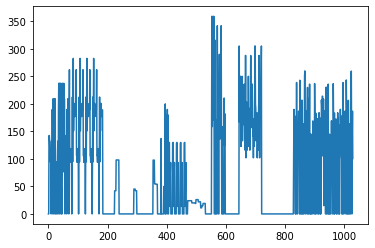

In [99]:
import matplotlib.pyplot as plt
df['slag'].plot()

* slag 데이터 값 중 300을 넘어가는 값은 모두 300으로 제한
* value_counts를 통해 초과되는값이 10개 있음을 알 수 있음

In [147]:

df.slag[df['slag']>300] =300

C:\Users\edu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
df[df['slag'] == 300]


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
553,239.6,300.0,0.0,185.7,0.0,941.6,664.3,7,25.422359
559,239.6,300.0,0.0,185.7,0.0,941.6,664.3,28,39.435269
563,210.7,300.0,0.0,185.7,0.0,977.0,689.3,7,21.819847
571,228.0,300.0,0.0,185.7,0.0,955.8,674.3,28,39.699339
583,210.7,300.0,0.0,185.7,0.0,977.0,689.3,28,37.813622
584,228.0,300.0,0.0,185.7,0.0,955.8,674.3,7,21.917063
645,203.5,300.0,0.0,203.5,0.0,963.4,630.0,7,19.539060
698,203.5,300.0,0.0,203.5,0.0,963.4,630.0,28,41.684340
699,203.5,300.0,0.0,203.5,0.0,963.4,630.0,3,9.561653
720,203.5,300.0,0.0,203.5,0.0,963.4,630.0,90,51.863764


In [149]:
(df.slag==300).value_counts()

False    1020
True       10
Name: slag, dtype: int64

False    1020
True       10
Name: slag, dtype: int64

C:\Users\mue\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


* 통계치를 통해 slag의 상한선(max)가 300으로 변경되었음을 확인

In [150]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.646553,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,85.559495,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,300.000000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.646553,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,85.559495,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,300.000000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


* 중복 데이터 확인하고 삭제하기
* (25개 삭제 되었음을 확인)

In [35]:
data = pd.DataFrame({'k1' : ['one','two'] * 3 + ['two'], 'k2' : [1,1,2,3,3,4,4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [36]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [37]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [151]:
df.duplicated().value_counts()

False    1005
True       25
dtype: int64

In [152]:
df.drop_duplicates()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [153]:
df.duplicated().value_counts()

False    1005
True       25
dtype: int64

25

False    1005
True       25
dtype: int64

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


* 수치 데이터 strength를 범주형으로 바꾸기
* (시멘트의 강도 수치에 따라 pass,fail로 구분한다고 가정)

In [154]:
import numpy as np

bins = [0, 45, 85]
names = ['fail', 'pass']

df['label'] = pd.cut(df['strength'], bins = bins, labels = names, include_lowest = True)


In [155]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,label
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,pass
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,pass
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,fail
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,fail
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,fail


In [18]:
bins = [0, 45, 85]
names = ['fail', 'pass']



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,label
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,pass
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,pass
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,fail
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,fail
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,fail


In [156]:
df['label'].value_counts()

fail    760
pass    270
Name: label, dtype: int64

fail    754
pass    251
Name: label, dtype: int64

* 타겟 데이터를 제외한 특성 데이터만으로 plot 만들기
* (그래프를 통해 각 특성들의 범위가 다름을 알 수 있음)

In [157]:
cnum = df.iloc[:,:-2]

In [24]:
cnum = concrete.iloc[:, :-2]

In [158]:
cnum

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


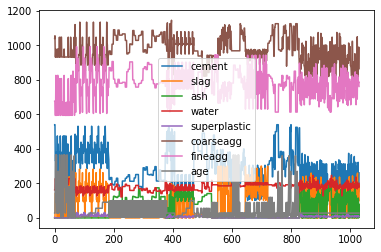

In [159]:
cnum.plot()

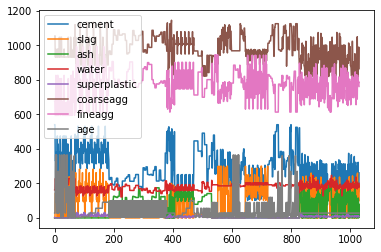

* 정규화, 표준화 작업하기

In [28]:
import numpy as np

In [160]:
def minmax_normalize(arr):
    return (arr-arr.min())/(arr.max()-arr.min())

def zscore_standize(arr):
    return (arr - arr.mean())/arr.std()

* DataFrame의 apply 함수를 통해 정규화한 데이터와 표준화한 데이터를 각각 그래프로 확인하기

In [161]:
concrete_mm = np.array(cnum.apply(minmax_normalize))

In [163]:
mmdf = pd.DataFrame(concrete_mm)

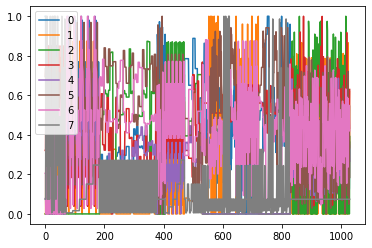

In [164]:
mmdf.plot()

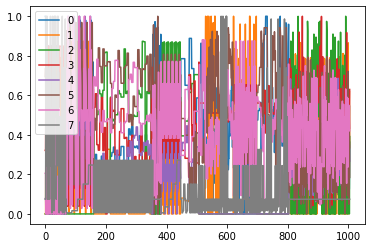

In [165]:
concrete_zc = np.array(cnum.apply(zscore_standize))

In [166]:
zcdf = pd.DataFrame(concrete_zc)

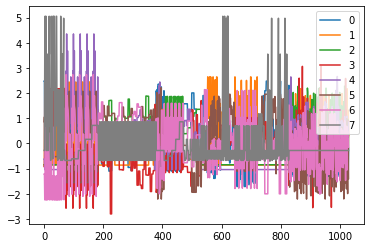

In [167]:
zcdf.plot()

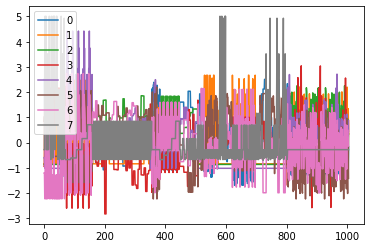